In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import preprocessing

In [2]:
def silhouette_plot(X, labels):
    fig = plt.figure()
    plt.title("Silhoutte plot")
    ax1 = plt.gca()
    ax1.set_xlim([-0.2, 1])
    n_clusters = np.unique(labels).shape[0]
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    y_lower = 10
    
    silhouette_avg = metrics.silhouette_score(X, labels)
    sample_silhouette_values = metrics.silhouette_samples(X, labels)
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = mpl.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

In [3]:
filename = "queijo.csv"
queijos = np.loadtxt(filename, dtype=str, delimiter=",", skiprows=1, usecols=(0,))
dados = np.loadtxt(filename, dtype=float, delimiter=",", skiprows=1, usecols=range(1, 10))

# vamos criar um indice para não precisar lembrar a ordem das colunas
colunas = ["calorias", "sodio", "calcio", "lipidios", "retinol", "folatos", "proteinas", "colesterol", "magnesio"]
ii = range(9)
idx = dict(zip(colunas, ii))
print(idx)

{'calorias': 0, 'sodio': 1, 'calcio': 2, 'lipidios': 3, 'retinol': 4, 'folatos': 5, 'proteinas': 6, 'colesterol': 7, 'magnesio': 8}


Para 2 grupos o coeficiente médio é: 0.4862625516965649
Queijo, Grupo
Yaourtlaitent.nat. 0
Petitsuisse40 0
Fr.frais40nat. 0
Fr.frais20nat. 0
Fr.chevrepatemolle 0
Tome 1
SaintPaulin 1
Rocquefort 1
Reblochon 1
Pyrenees 1
PontlEveque 1
Parmesan 1
Morbier 1
Maroilles 1
CarredelEst 1
Emmental 1
Edam 1
Coulomniers 1
Comte 1
Cheddar 1
Chaource 1
Chabichou 1
Cantal 1
Camembert 1
Bleu 1
Beaufort 1
Babybel 1
Vacherin 1
Fr.fondu.45 1


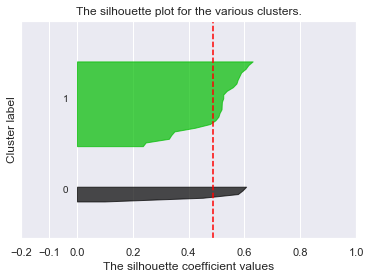

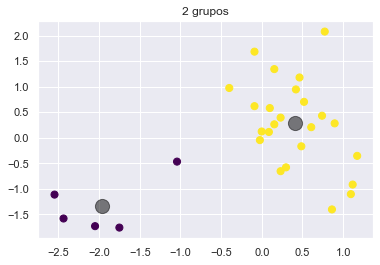

In [4]:
# normaliza cada coluna para ter variancia unitaria
dados_vu = preprocessing.scale(dados)

s_medios = []
n_grupos = 2

kmeans = KMeans(n_clusters=n_grupos)
kmeans.fit(dados_vu)
Y_estimado = kmeans.predict(dados_vu)
silhouette_medio = metrics.silhouette_score(dados_vu, Y_estimado)
s_medios.append(silhouette_medio)
silhouette_plot(dados_vu, Y_estimado)

silhouette_amostra = metrics.silhouette_samples(dados_vu, Y_estimado)
plt.figure()
plt.title("%d grupos" % n_grupos)
plt.scatter(dados_vu[:, 0], dados_vu[:, 1], c=Y_estimado, s=50, cmap='viridis')

centroides = kmeans.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', s=200, alpha=0.5);
print("Para", n_grupos, "grupos o coeficiente médio é:", silhouette_medio)

#sorted index of the clusters
idk = np.argsort(kmeans.labels_)

queijos_ord = queijos[idk]
grupos_ord = kmeans.labels_[idk]

print("Queijo, Grupo")
for q, g in zip(queijos_ord, grupos_ord):
    print(q, g)

Para 3 grupos o coeficiente médio é: 0.3360992054615513
Queijo, Grupo
Pyrenees 0
Babybel 0
Beaufort 0
Morbier 0
SaintPaulin 0
Cantal 0
Maroilles 0
Reblochon 0
Cheddar 0
Comte 0
Parmesan 0
Edam 0
Emmental 0
PontlEveque 0
Vacherin 0
Fr.frais40nat. 1
Yaourtlaitent.nat. 1
Fr.frais20nat. 1
Petitsuisse40 1
Rocquefort 2
Tome 2
CarredelEst 2
Coulomniers 2
Chaource 2
Chabichou 2
Camembert 2
Bleu 2
Fr.chevrepatemolle 2
Fr.fondu.45 2


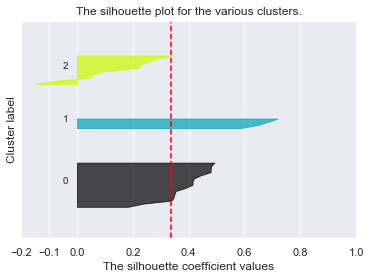

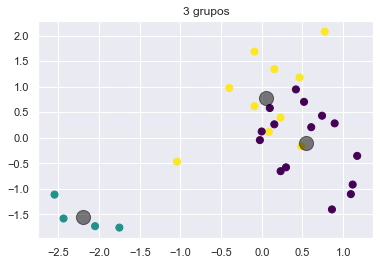

In [5]:
n_grupos = 3

kmeans = KMeans(n_clusters=n_grupos)
kmeans.fit(dados_vu)
Y_estimado = kmeans.predict(dados_vu)
silhouette_medio = metrics.silhouette_score(dados_vu, Y_estimado)
s_medios.append(silhouette_medio)
silhouette_plot(dados_vu, Y_estimado)

silhouette_amostra = metrics.silhouette_samples(dados_vu, Y_estimado)
plt.figure()
plt.title("%d grupos" % n_grupos)
plt.scatter(dados_vu[:, 0], dados_vu[:, 1], c=Y_estimado, s=50, cmap='viridis')

centroides = kmeans.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', s=200, alpha=0.5);
print("Para", n_grupos, "grupos o coeficiente médio é:", silhouette_medio)

#sorted index of the clusters
idk = np.argsort(kmeans.labels_)

queijos_ord = queijos[idk]
grupos_ord = kmeans.labels_[idk]

print("Queijo, Grupo")
for q, g in zip(queijos_ord, grupos_ord):
    print(q, g)

Para 4 grupos o coeficiente médio é: 0.34540073058640286
Queijo, Grupo
Yaourtlaitent.nat. 0
Petitsuisse40 0
Fr.frais40nat. 0
Fr.frais20nat. 0
Tome 1
SaintPaulin 1
Rocquefort 1
Reblochon 1
Pyrenees 1
PontlEveque 1
Morbier 1
Maroilles 1
Vacherin 1
Fr.fondu.45 1
Cheddar 1
Cantal 1
Bleu 1
Babybel 1
Coulomniers 2
Chaource 2
Chabichou 2
Camembert 2
Fr.chevrepatemolle 2
CarredelEst 2
Emmental 3
Edam 3
Comte 3
Parmesan 3
Beaufort 3


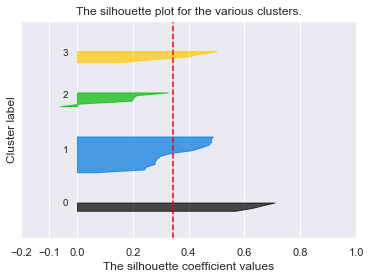

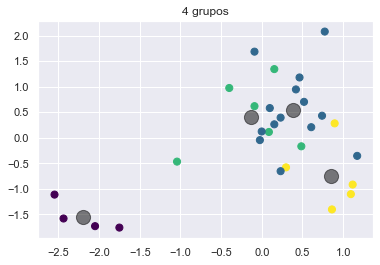

In [6]:
n_grupos = 4

kmeans = KMeans(n_clusters=n_grupos)
kmeans.fit(dados_vu)
Y_estimado = kmeans.predict(dados_vu)
silhouette_medio = metrics.silhouette_score(dados_vu, Y_estimado)
s_medios.append(silhouette_medio)
silhouette_plot(dados_vu, Y_estimado)

silhouette_amostra = metrics.silhouette_samples(dados_vu, Y_estimado)
plt.figure()
plt.title("%d grupos" % n_grupos)
plt.scatter(dados_vu[:, 0], dados_vu[:, 1], c=Y_estimado, s=50, cmap='viridis')

centroides = kmeans.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', s=200, alpha=0.5);
print("Para", n_grupos, "grupos o coeficiente médio é:", silhouette_medio)

#sorted index of the clusters
idk = np.argsort(kmeans.labels_)

queijos_ord = queijos[idk]
grupos_ord = kmeans.labels_[idk]

print("Queijo, Grupo")
for q, g in zip(queijos_ord, grupos_ord):
    print(q, g)

Para 5 grupos o coeficiente médio é: 0.3007452407020553
Queijo, Grupo
CarredelEst 0
Rocquefort 0
Coulomniers 0
Fr.fondu.45 0
Bleu 0
Fr.frais40nat. 1
Petitsuisse40 1
Fr.frais20nat. 1
Yaourtlaitent.nat. 1
Comte 2
Beaufort 2
Edam 2
Emmental 2
Cheddar 2
Parmesan 2
Tome 3
SaintPaulin 3
Babybel 3
Reblochon 3
Pyrenees 3
PontlEveque 3
Morbier 3
Maroilles 3
Vacherin 3
Cantal 3
Chabichou 4
Chaource 4
Fr.chevrepatemolle 4
Camembert 4


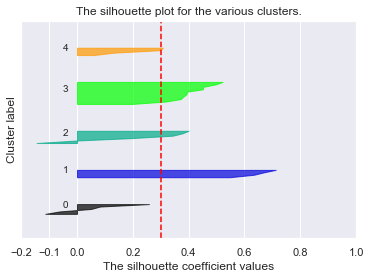

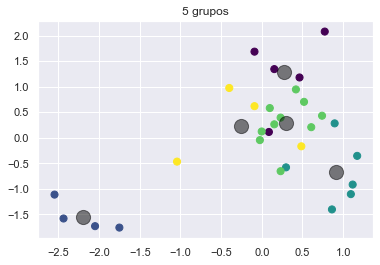

In [7]:
n_grupos = 5

kmeans = KMeans(n_clusters=n_grupos)
kmeans.fit(dados_vu)
Y_estimado = kmeans.predict(dados_vu)
silhouette_medio = metrics.silhouette_score(dados_vu, Y_estimado)
s_medios.append(silhouette_medio)
silhouette_plot(dados_vu, Y_estimado)

silhouette_amostra = metrics.silhouette_samples(dados_vu, Y_estimado)
plt.figure()
plt.title("%d grupos" % n_grupos)
plt.scatter(dados_vu[:, 0], dados_vu[:, 1], c=Y_estimado, s=50, cmap='viridis')

centroides = kmeans.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', s=200, alpha=0.5);
print("Para", n_grupos, "grupos o coeficiente médio é:", silhouette_medio)

#sorted index of the clusters
idk = np.argsort(kmeans.labels_)

queijos_ord = queijos[idk]
grupos_ord = kmeans.labels_[idk]

print("Queijo, Grupo")
for q, g in zip(queijos_ord, grupos_ord):
    print(q, g)

Para 6 grupos o coeficiente médio é: 0.31225561533988017
Queijo, Grupo
Fr.fondu.45 0
Babybel 0
Tome 0
Bleu 0
SaintPaulin 0
Cantal 0
Rocquefort 0
Reblochon 0
Cheddar 0
Pyrenees 0
PontlEveque 0
Morbier 0
Maroilles 0
Vacherin 0
Petitsuisse40 1
Fr.frais40nat. 1
Yaourtlaitent.nat. 1
Fr.frais20nat. 1
Emmental 2
Parmesan 2
Edam 2
Comte 2
Beaufort 2
Chaource 3
Chabichou 3
Camembert 3
Fr.chevrepatemolle 4
Coulomniers 5
CarredelEst 5


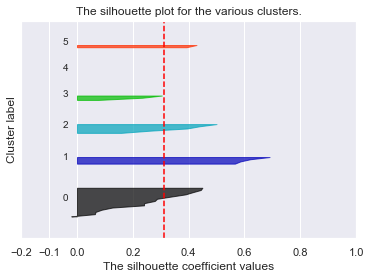

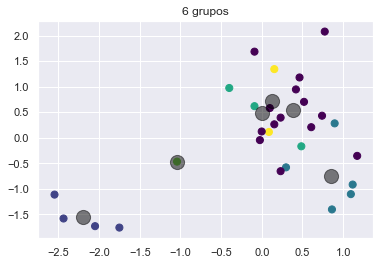

In [8]:
n_grupos = 6

kmeans = KMeans(n_clusters=n_grupos)
kmeans.fit(dados_vu)
Y_estimado = kmeans.predict(dados_vu)
silhouette_medio = metrics.silhouette_score(dados_vu, Y_estimado)
s_medios.append(silhouette_medio)
silhouette_plot(dados_vu, Y_estimado)

silhouette_amostra = metrics.silhouette_samples(dados_vu, Y_estimado)
plt.figure()
plt.title("%d grupos" % n_grupos)
plt.scatter(dados_vu[:, 0], dados_vu[:, 1], c=Y_estimado, s=50, cmap='viridis')

centroides = kmeans.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', s=200, alpha=0.5);
print("Para", n_grupos, "grupos o coeficiente médio é:", silhouette_medio)

#sorted index of the clusters
idk = np.argsort(kmeans.labels_)

queijos_ord = queijos[idk]
grupos_ord = kmeans.labels_[idk]

print("Queijo, Grupo")
for q, g in zip(queijos_ord, grupos_ord):
    print(q, g)

In [9]:
print(s_medios)

[0.4862625516965649, 0.3360992054615513, 0.34540073058640286, 0.3007452407020553, 0.31225561533988017]


Utilizando o coeficiente de silhueta médio ou o gráfico de silhueta é possível ver que o k escolhido deve ser 2, já que com valores maiores o coeficiente cai e o gráfico fica cada vez pior.